In [37]:
# load libraries
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [38]:
# self-defined function to ignore hidden files (.DS_store)
def listdir_nohidden(path):
    return [file for file in os.listdir(path) if not file.startswith('.')]


downscaled: 954
upscaled: 70
others: 651
downscaled: 1533
upscaled: 59
others: 220


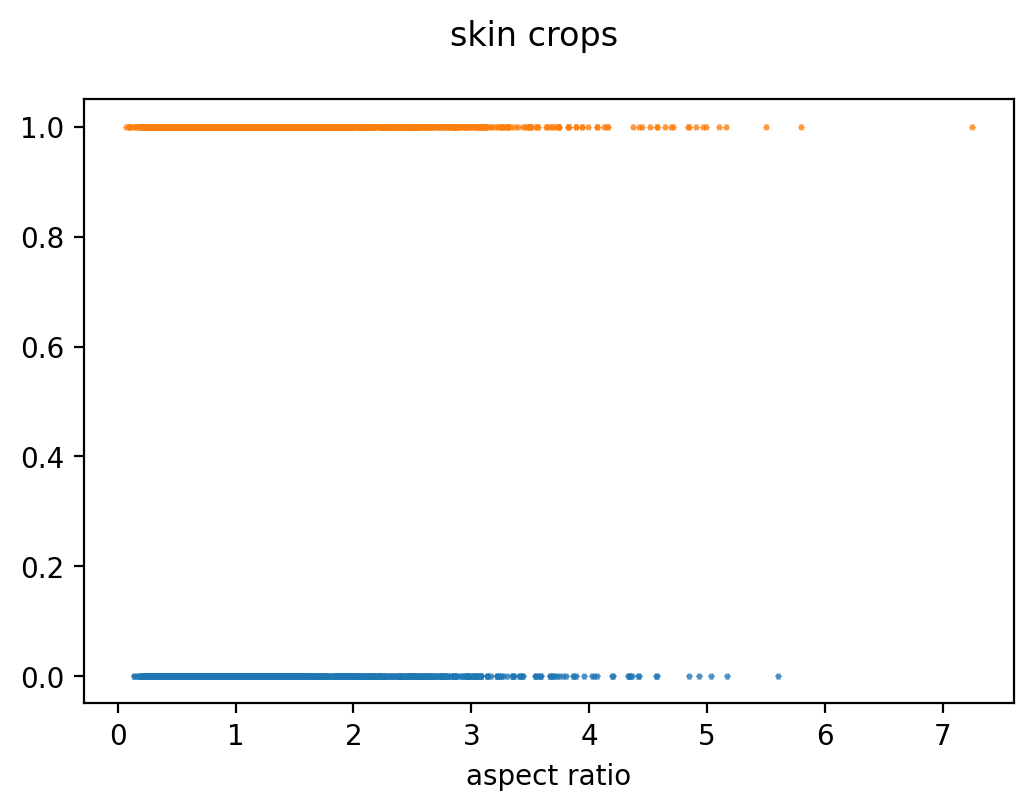

In [39]:
# define the threshold of statistics
threshold = 224

# read crops and count their sizes
crops_dir = ["../../EczemaNet/data/dataset_archieve_ZW/skin_seg_512_384/crops",
             "../../EczemaNet/data/dataset_archieve_ZW/skin_seg_1024_768/crops"]

# crops_dir = ["../../EczemaNet/data/dataset_archieve_ZW/ad_seg_512_384/crops",
#              "../../EczemaNet/data/dataset_archieve_ZW/ad_seg_1024_768/crops"]
sub_title = ["a", "b"]

fig = plt.figure(dpi=200)
for k in range(len(crops_dir)):
    crops_fns = listdir_nohidden(crops_dir[k])
    crops_fps = [os.path.join(crops_dir[k], crop_name) for crop_name in crops_fns]
    

    # class 1 records the number of crops that bigger than the threshold
    class_1_num = 0
    # class 2 records the number of crops that smaller than the threshold
    class_2_num = 0
    # class 3 records the number of crops which one side > threshold, the other smaller than the threshold.
    class_3_num = 0
    # aspect ratio records width / height
    aspect_ratio = [];
    
    # iterate through all the crops
    for i in range(len(crops_fns)):
        crop = cv2.imread(crops_fps[i])
        height = crop.shape[0]
        width = crop.shape[1]

        if height > threshold and width > threshold:
            class_1_num += 1
        elif height < threshold and width < threshold:
            class_2_num += 1
        else:
            class_3_num += 1
            
        aspect_ratio.append(width / height)
        
    print("downscaled: " + str(class_1_num))
    print("upscaled: " + str(class_2_num))
    print("others: " + str(class_3_num))
    
    # plot the pie chart to visualize result
    total_num = len(crops_fns)
    y = np.array([class_1_num, class_2_num, class_3_num])
    labels = [str(round(100*class_1_num/total_num,2)) + ' %', 
              str(round(100*class_2_num/total_num,2)) + ' %', 
              str(round(100*class_3_num/total_num,2)) + ' %']
    explode = [0.2, 0, 0]
#     plt.subplot(2, 2, 1 + k)
#     plt.pie(y, labels=labels, explode=explode, shadow=True)
    plt.scatter(aspect_ratio, np.full((1, len(aspect_ratio)), k), s=5, marker=str(k+1), alpha=0.8)
    

# plt.legend(['Downscale','Upscale','Others'], loc='upper center', bbox_to_anchor=(-0.4, -0.1), ncol=3)

# plt.savefig('ad.pdf', dpi=200)
plt.xlabel("aspect ratio")
plt.suptitle("skin crops")
plt.show()

downscaled: 488
upscaled: 283
others: 636
downscaled: 1016
upscaled: 479
others: 556


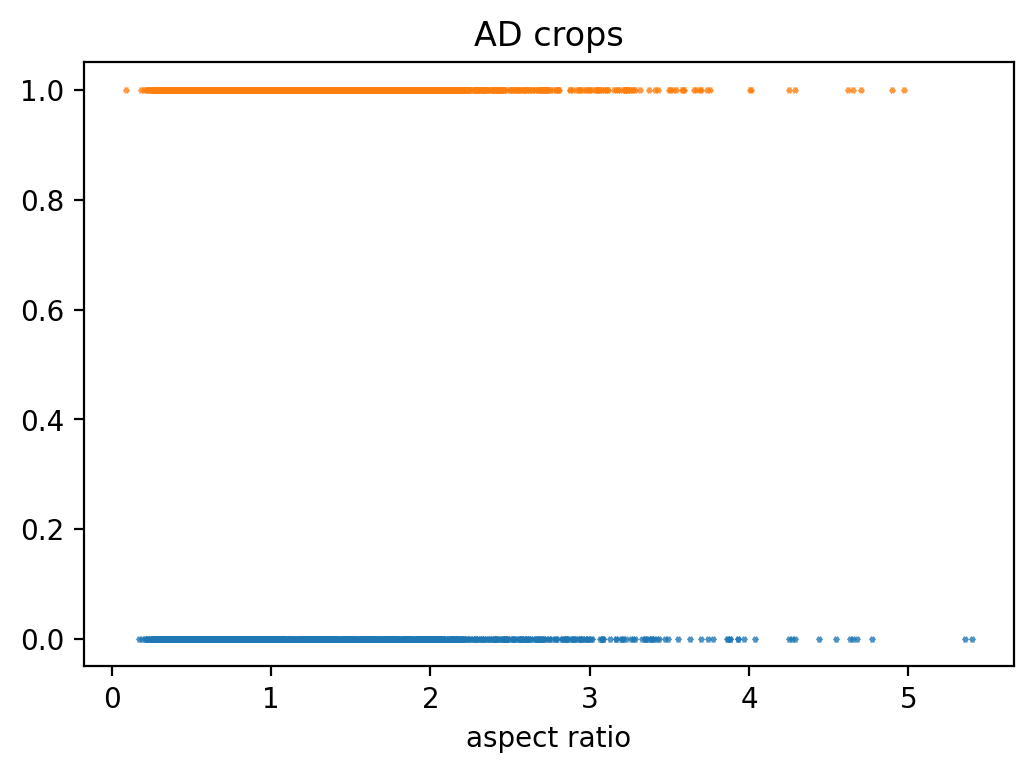

In [40]:
# define the threshold of statistics
threshold = 224

# read crops and count their sizes
# crops_dir = ["../../EczemaNet/data/dataset_archieve_ZW/skin_seg_512_384/crops",
#              "../../EczemaNet/data/dataset_archieve_ZW/skin_seg_1024_768/crops"]

crops_dir = ["../../EczemaNet/data/dataset_archieve_ZW/ad_seg_512_384/crops",
             "../../EczemaNet/data/dataset_archieve_ZW/ad_seg_1024_768/crops"]
sub_title = ["a", "b"]

fig = plt.figure(dpi=200)
for k in range(len(crops_dir)):
    crops_fns = listdir_nohidden(crops_dir[k])
    crops_fps = [os.path.join(crops_dir[k], crop_name) for crop_name in crops_fns]
    

    # class 1 records the number of crops that bigger than the threshold
    class_1_num = 0
    # class 2 records the number of crops that smaller than the threshold
    class_2_num = 0
    # class 3 records the number of crops which one side > threshold, the other smaller than the threshold.
    class_3_num = 0
    # aspect ratio records width / height
    aspect_ratio = [];
    
    # iterate through all the crops
    for i in range(len(crops_fns)):
        crop = cv2.imread(crops_fps[i])
        height = crop.shape[0]
        width = crop.shape[1]

        if height > threshold and width > threshold:
            class_1_num += 1
        elif height < threshold and width < threshold:
            class_2_num += 1
        else:
            class_3_num += 1
            
        aspect_ratio.append(width / height)
        
    print("downscaled: " + str(class_1_num))
    print("upscaled: " + str(class_2_num))
    print("others: " + str(class_3_num))
    
    # plot the pie chart to visualize result
    total_num = len(crops_fns)
    y = np.array([class_1_num, class_2_num, class_3_num])
    labels = [str(round(100*class_1_num/total_num,2)) + ' %', 
              str(round(100*class_2_num/total_num,2)) + ' %', 
              str(round(100*class_3_num/total_num,2)) + ' %']
    explode = [0.2, 0, 0]
#     plt.subplot(2, 2, 1 + k)
#     plt.pie(y, labels=labels, explode=explode, shadow=True)
    plt.scatter(aspect_ratio, np.full((1, len(aspect_ratio)), k), s=5, marker=str(k+1), alpha=0.8)
    

# plt.legend(['Downscale','Upscale','Others'], loc='upper center', bbox_to_anchor=(-0.4, -0.1), ncol=3)

# plt.savefig('ad.pdf', dpi=200)
plt.xlabel("aspect ratio")
plt.title("AD crops")
plt.show()